## Statistical Analysis
### Getting the endmember spectrum of soil carbon

Exercise for Xinyi: Find the F's and A's for the false dataset (the I's and partial A's) that I produced for you.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

"I" represented the reflectance spectra of soil from the RaCA dataset.

Let's load a fake RaCA dataset here for now and try to learn about it.

In [106]:
def loadRaCADataset() :
    # load the test dataset that Evan sent
    data=np.load('data/falseDataset_Exercise1_blinded.npz')
    return data['As'], data['Is'], data['Xaxis']

    #return np.zeros([NPoints,MSpectra])

#print(loadRaCADataset())

In [107]:
Adata,Idata,Xaxis = loadRaCADataset()
NPoints,MSpectra = Idata.shape
KEndmembers = 4 # I'm giving you this one

In [108]:
#xinyi trying to learn about data
print(f'Adata shape is {Adata.shape}, Adata is {Adata}')
print(f'Idata shape is {Idata.shape}, Idata is {Idata}')
print(f'Xaxis shape is {Xaxis.shape}, Xaxis is {Xaxis}')

print(NPoints)
print(MSpectra)

Adata shape is (100,), Adata is [0.17407013 0.09655238 0.2066713  0.27455309 0.19545699 0.19607207
 0.33378809 0.52045767 0.20367499 0.14634992 0.26465295 0.17586356
 0.2112697  0.43541577 0.26563968 0.28968768 0.13283029 0.28572091
 0.23725288 0.00588857 0.28875372 0.25316905 0.26518193 0.07351237
 0.12059232 0.00282519 0.19716723 0.2921394  0.12083434 0.42823909
 0.26509081 0.38258928 0.35515876 0.34201252 0.32395219 0.307452
 0.29118808 0.37008132 0.33974729 0.50532886 0.27145699 0.02302871
 0.43332861 0.24357411 0.2590783  0.01102311 0.12588701 0.18885682
 0.30490452 0.1721261  0.42099767 0.08423393 0.09482769 0.31398517
 0.34147212 0.0768255  0.22213933 0.14187043 0.33646075 0.37132618
 0.16970362 0.30886364 0.06575345 0.00416785 0.32513618 0.28705329
 0.03659426 0.27907509 0.41707108 0.18292284 0.39287196 0.2678888
 0.25070485 0.19769531 0.22745818 0.32148099 0.30053172 0.10228896
 0.0007367  0.35268111 0.23595134 0.10499138 0.26219498 0.07323593
 0.01117063 0.12579942 0.10873938

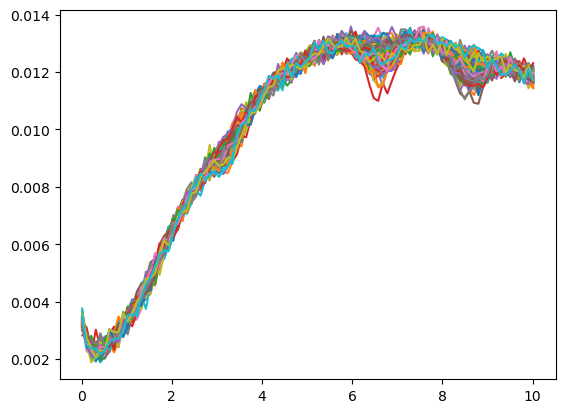

In [109]:
#look at the full I dataset
plt.plot(Xaxis, Idata.T) #targets #(n,m)
plt.show()

#without transpose #(m,n)
#plt.plot(Xaxis, Idata)
#plt.show()

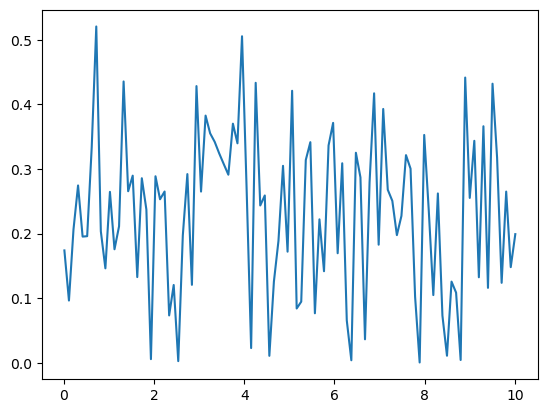

In [110]:
#look at the one set of A - (n,)
plt.plot(Xaxis, Adata)
plt.show()

"F" represented the endmember pure reflectance spectra from the ASD spectrometer. 

In [157]:
F0 = np.random.random([KEndmembers,MSpectra])#specifying the shape of F, 2-D array
F = F0/100
print(f"F shape = {F.shape}, F = {F}")     #shape of F: (4, 100) -(k,m)

F shape = (4, 100), F = [[9.58605856e-03 7.08086814e-03 8.48910670e-04 9.16370496e-03
  4.10720111e-03 2.61066773e-03 3.18696516e-03 8.55376168e-03
  4.22977744e-03 9.13766485e-03 8.54343827e-03 6.29841372e-03
  1.34291830e-03 2.31756662e-03 6.19399437e-04 2.37784107e-03
  4.99258380e-03 8.44962880e-03 5.15559286e-03 5.96571406e-03
  6.86445282e-03 8.22376158e-03 2.88797974e-04 8.42070745e-03
  8.95091673e-03 2.87355739e-04 5.35606272e-04 3.37315642e-03
  8.65294460e-03 2.87385953e-04 7.08250379e-03 9.70977288e-04
  1.51685553e-03 2.46992896e-03 5.45716295e-03 6.12806100e-03
  5.92446701e-03 9.85370178e-03 6.85792729e-03 3.54926928e-03
  9.48243464e-03 8.41614562e-03 6.12954772e-03 2.54493055e-04
  6.83793868e-03 9.14126072e-03 2.42632679e-03 3.21725603e-03
  2.10448676e-03 6.32184935e-03 9.38680971e-03 8.41340978e-03
  6.44702187e-03 9.84845987e-03 8.96049311e-04 1.89376061e-04
  4.95947676e-03 1.95146414e-03 6.75403797e-03 3.38670469e-03
  4.69446360e-03 9.15685507e-03 9.70885790e-03

"A" represented the endmember number abundances from the ASD spectrometer.

In [112]:
A = np.zeros([KEndmembers,NPoints]) #specifying shape of A
#print(f"A shape = {A.shape}, A = {A}")     #check the shape of A: (4, 100) (k,n)
#print(f"A shape = {A.T.shape}, A.T = {A.T}")     #check the shape of A.T: (100,4) (n,k)

In [113]:
A[0,:] = Adata.T

In [114]:
A.T[:,0]

array([0.17407013, 0.09655238, 0.2066713 , 0.27455309, 0.19545699,
       0.19607207, 0.33378809, 0.52045767, 0.20367499, 0.14634992,
       0.26465295, 0.17586356, 0.2112697 , 0.43541577, 0.26563968,
       0.28968768, 0.13283029, 0.28572091, 0.23725288, 0.00588857,
       0.28875372, 0.25316905, 0.26518193, 0.07351237, 0.12059232,
       0.00282519, 0.19716723, 0.2921394 , 0.12083434, 0.42823909,
       0.26509081, 0.38258928, 0.35515876, 0.34201252, 0.32395219,
       0.307452  , 0.29118808, 0.37008132, 0.33974729, 0.50532886,
       0.27145699, 0.02302871, 0.43332861, 0.24357411, 0.2590783 ,
       0.01102311, 0.12588701, 0.18885682, 0.30490452, 0.1721261 ,
       0.42099767, 0.08423393, 0.09482769, 0.31398517, 0.34147212,
       0.0768255 , 0.22213933, 0.14187043, 0.33646075, 0.37132618,
       0.16970362, 0.30886364, 0.06575345, 0.00416785, 0.32513618,
       0.28705329, 0.03659426, 0.27907509, 0.41707108, 0.18292284,
       0.39287196, 0.2678888 , 0.25070485, 0.19769531, 0.22745

"Ihat" represented our estimates of the data given F and A.

In [115]:
def computeModel(tF, tA) :
    return np.dot(tA.T,tF) #A.T -> the transpose of the array

Ihat = computeModel(F,A)

#print(Ihat.shape) - (n,m)

"E" represented the error of our estimates to the RaCA data in I.

In [116]:
def computeL2Error(I,Ih) : #L2: mean of squared root error
    return np.sum(np.dot((I-Ih),(I-Ih).T)) #sum across all the data points

E = computeL2Error(Idata,Ihat)

print(E) #check the error

112.60743017403581


In [117]:
#sub in Ihat into E
I = Idata
E = np.sum(np.dot((I-np.dot(A.T,F)),(I-np.dot(A.T,F)).T))
print(E)

112.60743017403581


We want E to be as small as possible, as a function of our input parameters in F and A.

Exercise for Xinyi: Implement gradient descent assuming F and A contain all of our model parameters.

In [163]:
learningRate = 0.001

'''
def computeGradient(tI, tA, tF, tLearningRate) :
    # return gradient of E w.r.t. elements of A and F
    return np.zeros([KEndmembers,NPoints]), np.zeros([KEndmembers,MSpectra])

def minimizeError(tI, tA, tF, tLearningRate, nEpochs) : 
    for i in range(nEpochs) :
        dA, dF = computeGradient(tI, tA, tF, tLearningRate)
        tA = tA - tLearningRate * dA
        tF = tF - tLearningRate * dF
'''        
'''
    Computes the gradient of E w.r.t. elements of A and F
    Args:
      I (ndarray (n,m)) : target values
      tI (ndarray (n,m)) : estimates of I
      tA (ndarray (k,n)) : model parameters  #tA.T (ndarray (n,k))
      tF (ndarray (k,m)) : model parameter
      #shape of np.dot(A.T, F) = (n,m)
      
    Returns:
      dA (ndarray (k,n)): The gradient of E w.r.t. the parameter A. 
      dF (ndarray (k,m)): The gradient of E w.r.t. the parameter F.
    
    #previous definitions
    # Number of training examples #m = MSpectra
    # Number of points on a spectrum #n = NPoints
    F = np.zeros([KEndmembers,MSpectra]) # K x M
    A = np.zeros([KEndmembers,NPoints]) #K x N
    Ihat = computeModel(F,A) = np.dot(A.T,F)
    E = computeL2Error(Idata,Ihat) = np.sum(np.dot((I-Ihat),(I-Ihat).T))
'''

def computeGradient(tI, tA, tF, tLearningRate) :
    I = Idata
    err = tI - I
    dA = 2 * np.dot(tF, err)
    dF = 2 * np.dot(tA, err.T) 
    return dA, dF

#checking model
#print(computeGradient(Ihat, Adata, F, learningRate))


def minimizeError(tI, tA, tF, tLearningRate, nEpochs) :
    A0 = tA.copy()
    F0 = tF.copy()
    I = Idata
    for i in range(nEpochs) :
        dA, dF = computeGradient(tI, A0, F0, tLearningRate)
#         print(dF)
        dA[0,:] = 0
#         print(dA[0,:])
        A0 = A0 - tLearningRate * dA
        F0 = F0 - tLearningRate * dF
#         print(tA[0,:])
        E = computeL2Error(I, computeModel(F0, A0))
#         E = np.sum(np.dot((I-np.dot(A0.T,F0)),(I-np.dot(A0.T,F0)).T))
        print(E)
    return F0, A0

In [164]:
print(minimizeError(Ihat, A, F, 0.001, 100))

90.33751163391358
88.47601972834443
86.63732586681769
84.82143000568317
83.02833210363147
81.25803212169319
79.51053002323832
77.78582577397566
76.08391934195227
74.40481069755305
72.7484998135003
71.11498666485349
69.50427122900892
67.91635348569952
66.35123341699469
64.80891100730034
63.28938624335876
61.79265911424872
60.318729611385564
58.867597728521446
57.439263461745504
56.03372680948421
54.65098777250172
53.29104635390033
51.953902559120934
50.63955639594361
49.34800787448826
48.07925700721525
46.83330380892622
45.61014829676484
44.40979049021773
43.23223041111539
42.07746808363318
40.94550353429243
39.836336791961536
38.7499678878572
37.68639685554564
36.64562373094394
35.62764855232143
34.63247136030117
33.66009219786139
32.710511110337166
31.783728145421975
30.879743353169463
29.998556785995188
29.140168498678463
28.304578548364248
27.491786994565135
26.70179389916335
25.934599326412865
25.190203342941544
24.468606017753366
23.769807422230727
23.09380763013676
22.44060671761

Down the road: We will implement an AdamOptimizer to do gradient descent for us. 